<a href="https://colab.research.google.com/github/Michaelzats/Crypto-Predictor/blob/main/Assets_Optimiser_Crypto_comparison_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q yfinance


     |████████████████████████████████| 63 kB 472 kB/s 
     |████████████████████████████████| 6.4 MB 41.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


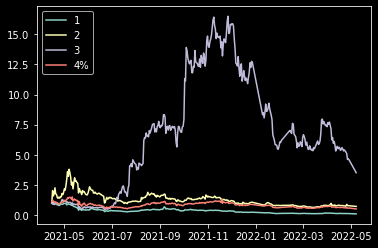

In [6]:
# ASSETS ALLOCATION 
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


#WRITE YOUR ASSETS PROPORTION HERE

weightings1 = {"FIL-USD":"100"}
weightings2 = {"DOGE-USD":"100"}
weightings3 = {"AXS-USD":"74", "GALA-USD":"9","SOL-USD":"11","XYO-USD":"3"}
# weightings3 = {"DOGE-USD":"7", "BTC-USD":"14","ENJ-USD":"7","ETH-USD":"9","SHIB-USD":"7","LTC-USD":"7","LINK-USD":"7","FIL-USD":"7","CHZ-USD":"7","ANK-USD":"7","ADA-USD":"7","XRP-USD":"7","ATOM-USD":"7"}
weightings4 = {"DOGE-USD":"10", "BTC-USD":"10","ENJ-USD":"10","ETH-USD":"10","LTC-USD":"20","LINK-USD":"7","FIL-USD":"7","CHZ-USD":"7","ANK-USD":"7","ADA-USD":"7","XRP-USD":"7","ATOM-USD":"7"}

# weightings4 = {"ENJ-USD":"100"}
# weightings5 = {"SKL-USD":"100"}
# weightings6 = {"SHIB-USD":"100"}
# weightings7 = {"LTC-USD":"100"}
# weightings8 = {"LINK-USD":"100"}
# weightings9 = {"FIL-USD":"100"}
# weightings10 = {"CHZ-USD":"100"}
# weightings11 = {"ANK-USD":"100"}
# weightings12 = {"ADA-USD":"100"}
# weightings13 = {"XRP-USD":"100"}
# weightings14 = {"ATOM-USD":"100"}
# weightings4 = {"ADA-USD":"100"}
# EXAMPLE = {"DOGE-USD":"30","BTC-USD":"30", "ENJ-USD":'40' }
# weightings3 = {"DOGE-USD":"7", "BTC-USD":"14","ENJ-USD":"7","ETH-USD":"9","SHIB-USD":"7","LTC-USD":"7","LINK-USD":"7","FIL-USD":"7","CHZ-USD":"7","ANK-USD":"7","ADA-USD":"7","XRP-USD":"7","ATOM-USD":"7"}
# weightings4 = {"DOGE-USD":"10", "BTC-USD":"10","ENJ-USD":"10","ETH-USD":"10","LTC-USD":"20","LINK-USD":"7","FIL-USD":"7","CHZ-USD":"7","ANK-USD":"7","ADA-USD":"7","XRP-USD":"7","ATOM-USD":"7"}


members = ["BTC-USD",
           "ETH-USD", 
           "DOGE-USD", 
           "ENJ-USD", 
           "SKL-USD", 
           "SHIB-USD", 
           "LTC-USD", 
           "LINK-USD", 
           "FIL-USD", 
           "CHZ-USD", 
           "ANK-USD", 
           "ADA-USD", 
           "XRP-USD", 
           "ATOM-USD",
           "AXS-USD",
           "GALA-USD",
           "SOL-USD",
           "XYO-USD"]


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[basedata["Date"] > "2016-01-01"]


# print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])

basedata = PortfolioCalc(weightings1, basedata, "crypto1")
basedata = PortfolioCalc(weightings2, basedata, "crypto2")
basedata = PortfolioCalc(weightings3, basedata, "crypto3")
basedata = PortfolioCalc(weightings4, basedata, "crypto4")

# for x in members:
#   plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.style.use("dark_background")

plt.plot(basedata["Date"], basedata["crypto1"], label = "1")
plt.plot(basedata["Date"], basedata["crypto2"], label = "2")
plt.plot(basedata["Date"], basedata["crypto3"], label = "3")
plt.plot(basedata["Date"], basedata["crypto4"], label = "4")

plt.legend(loc="upper left")
plt.show()







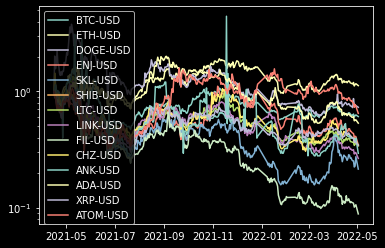

In [ ]:
# WHAT IS THE MOST STRONGEST CRYPTO?
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# weightings3 = {"DOGE-USD":"30","BTC-USD":"30", "ENJ-USD":'40' }



# THE NAME OF THE CRYPTO:
members = ["BTC-USD",
           "ETH-USD", 
           "DOGE-USD", 
           "ENJ-USD", 
           "SKL-USD", 
           "SHIB-USD", 
           "LTC-USD", 
           "LINK-USD", 
           "FIL-USD", 
           "CHZ-USD", 
           "ANK-USD", 
           "ADA-USD", 
           "XRP-USD", 
           "ATOM-USD"]


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[  basedata["Date"] > "2016-01-01"]


# print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])


for x in members:
  plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.legend(loc="upper left")







           Date       BTC-USD         SPY
326  2016-01-04    430.061005  179.081557
327  2016-01-05    433.069000  179.894350
328  2016-01-06    431.855988  177.161150
329  2016-01-07    430.010986  174.472559
330  2016-01-08    457.537994  174.347529
...         ...           ...         ...
1915 2022-04-26  40448.421875  425.829987
1916 2022-04-27  38120.300781  417.239990
1917 2022-04-28  39241.429688  422.290009
1918 2022-04-29  39768.617188  423.589996
1919 2022-05-02  38491.511719  412.070007

[1594 rows x 3 columns]


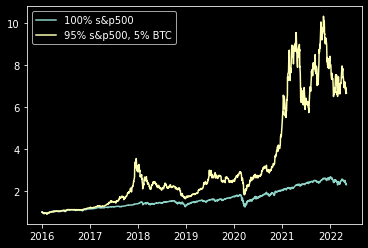

In [ ]:
# Original Code

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


weightings1 = {"SPY":"100"}
weightings2 = {"SPY":"95","BTC-USD":"5"}


members = ["BTC-USD","SPY"]


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[  basedata["Date"] > "2016-01-01"]


print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])

basedata = PortfolioCalc(weightings1, basedata, "crypto1")
basedata = PortfolioCalc(weightings2, basedata, "crypto2")

#for x in members:
  #plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.style.use("dark_background")

plt.plot(basedata["Date"], basedata["crypto1"], label = "100% s&p500")
plt.plot(basedata["Date"], basedata["crypto2"], label = "95% s&p500, 5% BTC")

plt.legend(loc="upper left")
plt.show()
















